<a href="https://colab.research.google.com/github/alexandre-pinon/deep-learning-learning/blob/master/ztm/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Convolutional Neural Networks and Computer Vision with TensorFlow
So far we've covered the basics of TensorFlow and built a handful of models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, convolutional neural networks (CNNs) can be used for computer vision (detecting patterns in visual data).

>🔑 **Note**: In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:

- Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
- Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)

In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.

## Get the data
Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the `Food-101` dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

>🔑 **Note**: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

We'll download the `pizza_steak` subset .zip file and unzip it.

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-03-28 12:51:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  46.6MB/s    in 2.2s    

2022-03-28 12:51:37 (46.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:

- A train directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
- A test directory with the same structure as the train directory.
Example of file structure

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [59]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

>🤔 **Note**: Whenever you're working with data, it's always good to visualize it as much as possible. Treat your first couple of steps of a project as becoming one with the data. **Visualize, visualize, visualize**.

In [ ]:
os.listdir('pizza_steak/train')

['pizza', 'steak']

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)[0]

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(f'{target_folder}/{random_image}')
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [3]:
img = view_random_image('pizza_steak/train/', 'pizza');

NameError: ignored

In [40]:
import tensorflow as tf

>🔑 **Note**: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between `0` and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by `255`.

##An end-to-end example
We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the original dataset authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

>🔑 **Note**: A **baseline** is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

The code in the following cell replicates and end-to-end way to model our `pizza_steak` dataset with a convolutional neural network (CNN) using the components listed above.

There will be a bunch of things you might not recognize but step through the code yourself and see if you can figure out what it's doing.

We'll go through each of the steps later on in the notebook.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the CNN explainer webpage.

>📖 **Resource**: The architecture we're using below is a scaled-down version of VGG-16, a convolutional neural network which came 2nd in the 2014 ImageNet classification competition.

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 25s 259ms/step - loss: 0.5545 - accuracy: 0.7000 - val_loss: 0.3849 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 11s 243ms/step - loss: 0.4082 - accuracy: 0.8087 - val_loss: 0.3345 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 11s 224ms/step - loss: 0.3975 - accuracy: 0.8247 - val_loss: 0.3321 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3636 - accuracy: 0.8493 - val_loss: 0.3068 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 13s 281ms/step - loss: 0.3245 - accuracy: 0.8500 - val_loss: 0.3211 - val_accuracy: 0.8660


>🤔 **Note**: If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.

In [6]:
!nvidia-smi

Mon Mar 28 12:52:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
len(train_data)

47

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before
To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(name='no_cnn')
model_2.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
model_2.add(tf.keras.layers.Dense(4, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Why sigmoid ?

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')


# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6940 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000


In [42]:
import pandas as pd

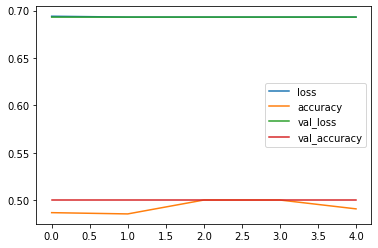

In [ ]:
pd.DataFrame(history_2.history).plot()

Ok, so that's terrible, let's try to improve this old model!

Epoch 1/10
47/47 [==============================] - 9s 182ms/step - loss: 2.7923 - accuracy: 0.6073 - val_loss: 0.5936 - val_accuracy: 0.7600
Epoch 2/10
47/47 [==============================] - 8s 174ms/step - loss: 1.0069 - accuracy: 0.6920 - val_loss: 0.6458 - val_accuracy: 0.7600
Epoch 3/10
47/47 [==============================] - 8s 181ms/step - loss: 0.7170 - accuracy: 0.7320 - val_loss: 0.8633 - val_accuracy: 0.6520
Epoch 4/10
47/47 [==============================] - 9s 186ms/step - loss: 0.7068 - accuracy: 0.7280 - val_loss: 1.0240 - val_accuracy: 0.6080
Epoch 5/10
47/47 [==============================] - 8s 176ms/step - loss: 0.6570 - accuracy: 0.7387 - val_loss: 1.2077 - val_accuracy: 0.6100
Epoch 6/10
47/47 [==============================] - 9s 199ms/step - loss: 0.4982 - accuracy: 0.7993 - val_loss: 0.4525 - val_accuracy: 0.7880
Epoch 7/10
47/47 [==============================] - 8s 175ms/step - loss: 0.3899 - accuracy: 0.8327 - val_loss: 0.7512 - val_accuracy: 0.6600
Epoch 

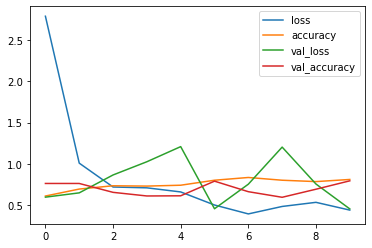

In [ ]:
# Set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential(name='no_cnn')
model_3.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')


# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

pd.DataFrame(history_3.history).plot()

In [ ]:
model_3.summary()

Model: "no_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


>🔑 **Note**: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary classification: Let's break it down
We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### Visualize the data

Image shape: (289, 512, 3)
Image shape: (512, 512, 3)


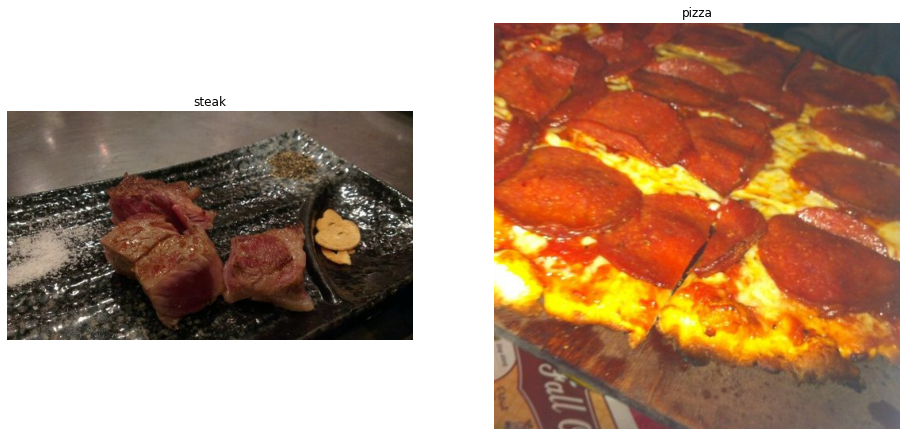

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
steak_img = view_random_image('pizza_steak/train/', 'steak');

plt.subplot(122)
pizza_img = view_random_image('pizza_steak/train/', 'pizza');

### Preprocess the data

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.
Why **32**?

A batch size of **32** is good for your health.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.

In [ ]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Some things to here:

- Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
- The `target_size` parameter defines the input size of our images in (height, width) format.
- The `class_mode` value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
- The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there ?
len(train_data)

47

In [ ]:
# Shape of our first training batch
images.shape

(32, 224, 224, 3)

In [ ]:
# View the first batch of labels (pizza = 0, steak = 1)
labels, labels.shape

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       dtype=float32), (32,))

### Create a CNN model (start with a baseline)

You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

>🔑 **Note**: In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the CNN explainer website (model_1 from above) and build a 3 layer convolutional neural network.

In [43]:
# Make the creating of our models easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going accross the input (higher = more complex model)
         kernel_size=3, # the size of the window going accross an input
         strides=1, # the size of the step the sliding window takes accross an input
         padding='valid', # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

`Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output`

Let's discuss some of the components of the **Conv2D** layer:

- The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
- `filters` - these are the number of "feature extractors" that will be moving over our images.
- `kernel_size` - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
- `stride` - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
- `padding` - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

In [ ]:
# Compile the model
model_4.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Fit the model

Our model is compiled, time to fit it.

You'll notice two new parameters here:

- `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
- `validation_steps` - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 1.4948 - accuracy: 0.6547 - val_loss: 0.4719 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4448 - accuracy: 0.8007 - val_loss: 0.4160 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3133 - accuracy: 0.8747 - val_loss: 0.4460 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.1678 - accuracy: 0.9527 - val_loss: 0.4475 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.0565 - accuracy: 0.9867 - val_loss: 0.6593 - val_accuracy: 0.7620


### Evaluate the model
Oh yeah! Looks like our model is learning something.

Let's check out its training curves.

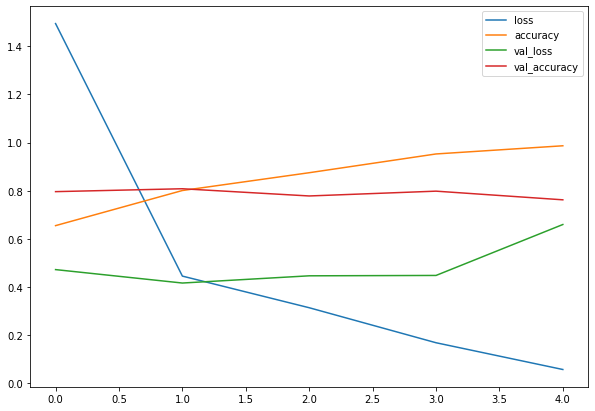

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.

>🔑 **Note**: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [14]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure(figsize=(15, 5))
  # Plot loss
  plt.subplot(121)
  plt.plot(epochs, loss, label='training_loss', c='r')
  plt.plot(epochs, val_loss, label='val_loss', c='orange')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(122)
  plt.plot(epochs, accuracy, label='training_accuracy', c='g')
  plt.plot(epochs, val_accuracy, label='val_accuracy', c='lightgreen')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [8]:
plot_loss_curves(history_4)

NameError: ignored

### Adjust the model parameters
Fitting a machine learning model comes in 3 steps:

- Create a basline.
- Beat the baseline by overfitting a larger model.
- Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

- Increase the number of convolutional layers.
- Increase the number of convolutional filters.
- Add another dense layer to the output of our flattened layer.

Ways to reduce overfitting (same as **regularization**):
- Add data augmentation
- Add regularization layers (such as MaxPool2D)
- Add more data

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

In [30]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [31]:
 model_5.compile(loss='binary_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [32]:
w, b = model_5.layers[0].get_weights()

In [33]:
w.shape, w.size, b.shape

((3, 3, 3, 10), 270, (10,))

In [34]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 10)      

In [35]:
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 227ms/step - loss: 0.8049 - accuracy: 0.5020 - val_loss: 0.6823 - val_accuracy: 0.5780
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.6890 - accuracy: 0.5460 - val_loss: 0.6577 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6293 - accuracy: 0.6967 - val_loss: 0.5814 - val_accuracy: 0.6880
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.5774 - accuracy: 0.7080 - val_loss: 0.4642 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.5223 - accuracy: 0.7800 - val_loss: 0.4521 - val_accuracy: 0.8240


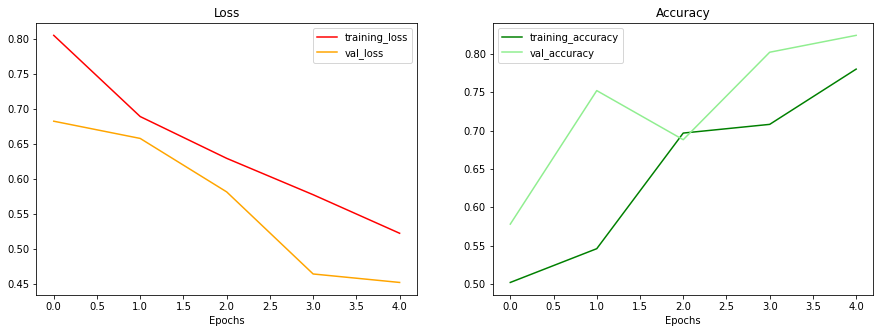

In [36]:
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [22]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

>🤔 **Question**: *WTF* is data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

>🔑 **Note**: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [46]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [24]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

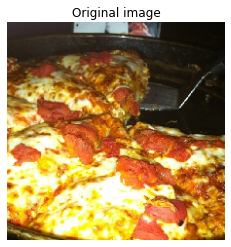

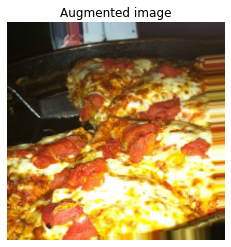

In [25]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

>🤔 Question: Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

Epoch 1/5
47/47 [==============================] - 36s 540ms/step - loss: 0.7086 - accuracy: 0.5040 - val_loss: 0.6758 - val_accuracy: 0.5440
Epoch 2/5
47/47 [==============================] - 26s 560ms/step - loss: 0.6960 - accuracy: 0.4987 - val_loss: 0.6865 - val_accuracy: 0.7080
Epoch 3/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6867 - accuracy: 0.5913 - val_loss: 0.6553 - val_accuracy: 0.7200
Epoch 4/5
47/47 [==============================] - 25s 536ms/step - loss: 0.6564 - accuracy: 0.6187 - val_loss: 0.5702 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6882 - accuracy: 0.5727 - val_loss: 0.5763 - val_accuracy: 0.7080


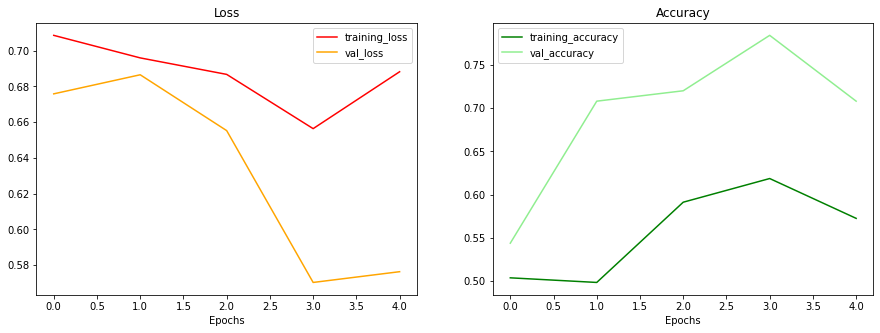

In [29]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])
 
history_6 = model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))
 
plot_loss_curves(history_6)

In [47]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # Now try with shuffle

Augmented training images:
Found 1500 images belonging to 2 classes.


Epoch 1/5
47/47 [==============================] - 27s 554ms/step - loss: 0.6563 - accuracy: 0.6133 - val_loss: 0.5054 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 25s 540ms/step - loss: 0.5377 - accuracy: 0.7413 - val_loss: 0.4016 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 25s 533ms/step - loss: 0.5167 - accuracy: 0.7487 - val_loss: 0.3613 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 25s 535ms/step - loss: 0.4919 - accuracy: 0.7707 - val_loss: 0.3826 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 25s 530ms/step - loss: 0.4584 - accuracy: 0.7867 - val_loss: 0.3297 - val_accuracy: 0.8620


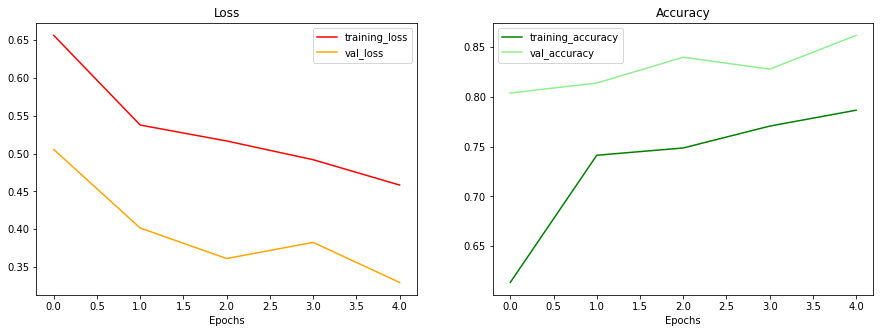

In [38]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])
 
history_7 = model_7.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))
 
plot_loss_curves(history_7)

### Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

- Increase the number of model layers (e.g. add more convolutional layers).
- Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
- Train for longer (more epochs).
- Finding an ideal learning rate.
- Get more data (give the model more opportunities to learn).
- Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (model_1 or the TinyVGG architecture from CNN explainer).

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_16 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

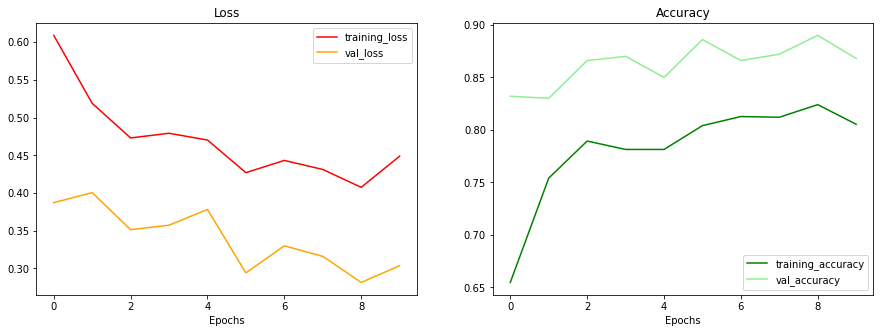

In [49]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_8.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

model_8.summary()

history_8 = model_8.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

plot_loss_curves(history_8)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_18 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_20 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                 

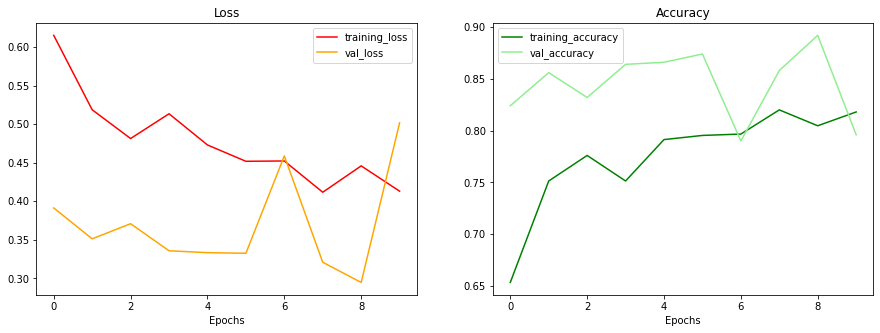

In [50]:
model_9 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_9.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

model_9.summary()

history_9 = model_9.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

plot_loss_curves(history_9)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_22 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_24 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                 

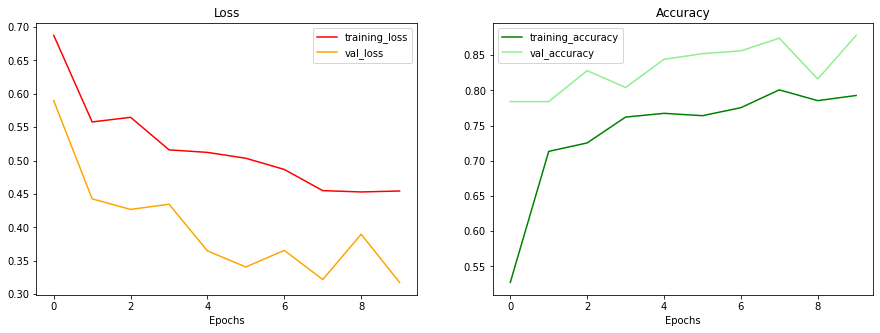

In [51]:
model_10 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_10.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

model_10.summary()

history_10 = model_10.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

plot_loss_curves(history_10)

### Making a prediction with our trained model

--2022-03-28 14:51:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2022-03-28 14:51:52 (27.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



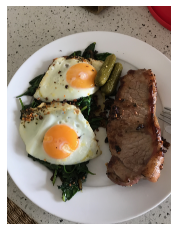

In [52]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [53]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using tf.io.read_file (for readining files) and tf.image (for resizing our image and turning it into a tensor).

>🔑 **Note**: For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [13]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [55]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [56]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [57]:
# Make a prediction on custom image tensor
pred = model_10.predict(steak)
pred

array([[0.83652717]], dtype=float32)

In [60]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [30]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  # Get the predicted class
  if len(pred[0]) > 1:
    percentage = tf.reduce_max(pred[0])
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    percentage = pred[0][0] if pred[0][0] >= 0.5 else 1 - pred[0][0]
    pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class} ({percentage:.1%})")
  plt.axis(False);

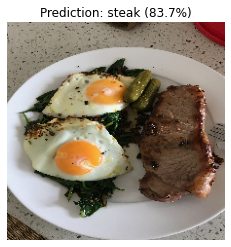

In [72]:
# Test our model on a custom image
pred_and_plot(model_10, "03-steak.jpeg", class_names)

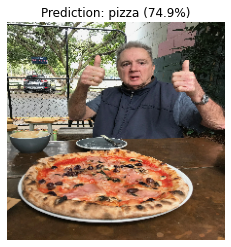

In [73]:
# Download another test image and make a prediction on it
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_10, "03-pizza-dad.jpeg", class_names)

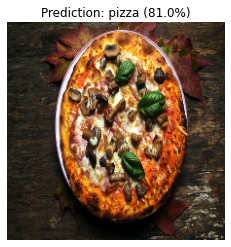

In [74]:
pred_and_plot(model_10, "random_pizza.jpg", class_names)

## Multi-class Image Classification

### Import and become one with the data

In [3]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-03-28 17:38:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   212MB/s    in 2.3s    

2022-03-28 17:38:59 (212 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

NameError: ignored

### Preprocess the data (prepare it for a model)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


>🤔 **Question**: Why is the image size 224x224? This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on your problem you might want to use larger or smaller images.

### Create a model (start with a baseline)

We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:

- Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
- Changing the output layer to use `'softmax'` activation instead of `'sigmoid'` activation.
- Changing the loss function to be `'categorical_crossentropy'` instead of `'binary_crossentropy'`.

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [98]:


# Create our model (a clone of model_8, except to be multi-class)
model_11 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(len(class_names), activation='softmax')
])

model_11.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [99]:
model_11.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_32 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_34 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

### Fit a model

Epoch 1/5
235/235 [==============================] - 65s 275ms/step - loss: 2.2277 - accuracy: 0.1693 - val_loss: 2.0071 - val_accuracy: 0.3008
Epoch 2/5
235/235 [==============================] - 66s 279ms/step - loss: 1.9388 - accuracy: 0.3291 - val_loss: 1.9404 - val_accuracy: 0.3096
Epoch 3/5
235/235 [==============================] - 57s 241ms/step - loss: 1.6602 - accuracy: 0.4344 - val_loss: 2.0762 - val_accuracy: 0.3060
Epoch 4/5
235/235 [==============================] - 57s 241ms/step - loss: 1.2259 - accuracy: 0.5887 - val_loss: 2.2962 - val_accuracy: 0.2932
Epoch 5/5
235/235 [==============================] - 56s 240ms/step - loss: 0.6753 - accuracy: 0.7772 - val_loss: 3.0270 - val_accuracy: 0.2672


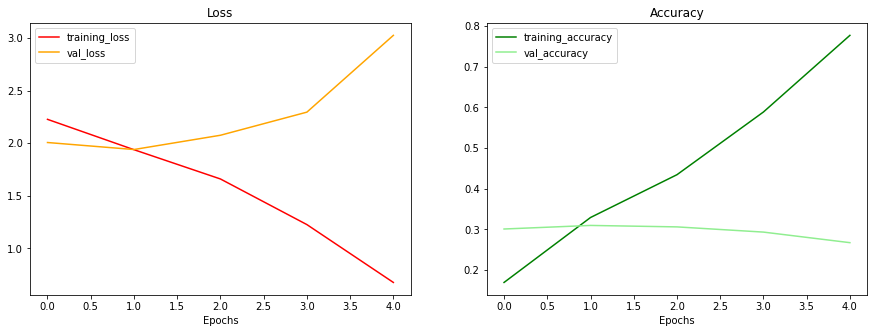

In [100]:
history_11 = model_11.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

plot_loss_curves(history_11)

Why do you think each epoch takes longer than when working with only two classes of images?

It's because we're now dealing with more images than we were before. We've got 10 classes with 750 training images and 250 validation images each totalling 10,000 images. Where as when we had two classes, we had 1500 training images and 500 validation images, totalling 2000.

The intuitive reasoning here is the more data you have, the longer a model will take to find patterns.

### Evaluate the model

In [101]:
# Evaluate on the test data
model_11.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 3.0270 - accuracy: 0.2672


[3.0269901752471924, 0.2671999931335449]

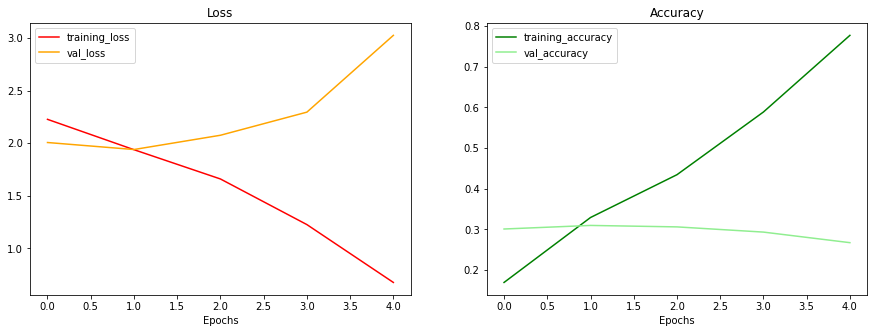

In [102]:
plot_loss_curves(history_11)

Woah, that's quite the gap between the training and validation loss curves.

What does this tell us?

It seems our model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

### Adjust the model parameters

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

Let's try simplifying our model first:

Epoch 1/5
235/235 [==============================] - 55s 230ms/step - loss: 2.1947 - accuracy: 0.2231 - val_loss: 2.0352 - val_accuracy: 0.2840
Epoch 2/5
235/235 [==============================] - 53s 226ms/step - loss: 1.7694 - accuracy: 0.4019 - val_loss: 1.9408 - val_accuracy: 0.3224
Epoch 3/5
235/235 [==============================] - 53s 225ms/step - loss: 1.3771 - accuracy: 0.5489 - val_loss: 2.0185 - val_accuracy: 0.3320
Epoch 4/5
235/235 [==============================] - 52s 223ms/step - loss: 0.9305 - accuracy: 0.7107 - val_loss: 2.2455 - val_accuracy: 0.3048
Epoch 5/5
235/235 [==============================] - 53s 225ms/step - loss: 0.5108 - accuracy: 0.8572 - val_loss: 2.8493 - val_accuracy: 0.2908


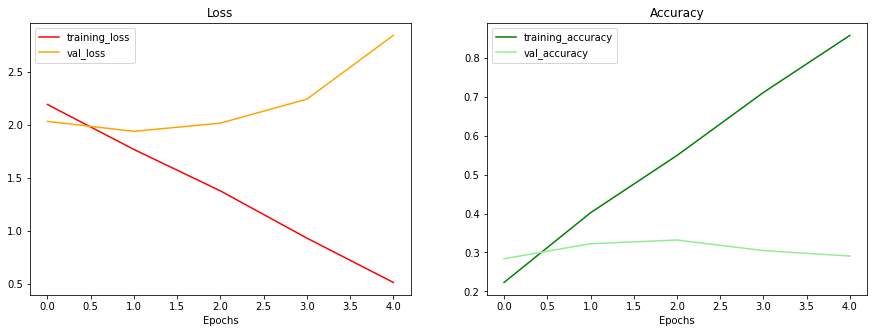

In [106]:
model_12 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(len(class_names), activation='softmax')
])

model_12.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

history_12 = model_12.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

plot_loss_curves(history_12)

Hmm.. How about data augmentation?

In [11]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle


Augmented training images:
Found 7500 images belonging to 10 classes.


Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called `clone_model` which can take an existing model and rebuild it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

>🔑 **Note**: One of the key practices in deep learning and machine learning in general is to be a **serial experimenter**. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

Epoch 1/5
235/235 [==============================] - 130s 550ms/step - loss: 2.3144 - accuracy: 0.1583 - val_loss: 2.1125 - val_accuracy: 0.2344
Epoch 2/5
235/235 [==============================] - 129s 549ms/step - loss: 2.1304 - accuracy: 0.2271 - val_loss: 1.9797 - val_accuracy: 0.2984
Epoch 3/5
235/235 [==============================] - 130s 555ms/step - loss: 2.0645 - accuracy: 0.2672 - val_loss: 1.9419 - val_accuracy: 0.3040
Epoch 4/5
235/235 [==============================] - 131s 555ms/step - loss: 2.0308 - accuracy: 0.2793 - val_loss: 1.9258 - val_accuracy: 0.3204
Epoch 5/5
235/235 [==============================] - 131s 558ms/step - loss: 2.0078 - accuracy: 0.2948 - val_loss: 1.9122 - val_accuracy: 0.3360


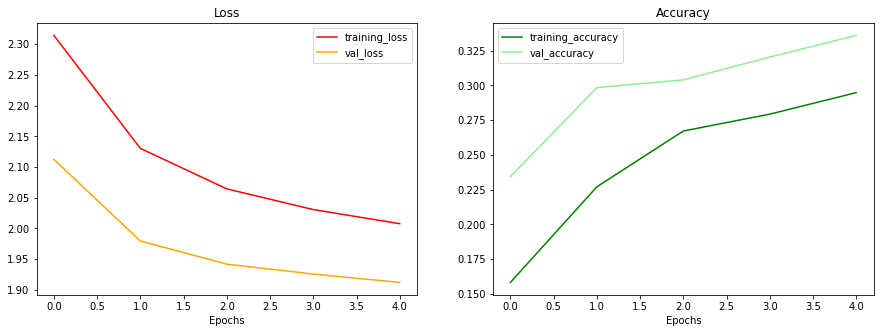

In [107]:
# Clone the model (use the same architecture)
model_13 = tf.keras.models.clone_model(model_12)

# Compile the cloned model (same setup as used for model_10)
model_13.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_13 = model_13.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

plot_loss_curves(history_13)

### Repeat until satisfied

In [16]:
# Clone the model (use the same architecture)
model_14 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(len(class_names), activation='softmax')
])

# Compile the cloned model (same setup as used for model_10)
model_14.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 134s 565ms/step - loss: 2.1896 - accuracy: 0.1992 - val_loss: 2.0315 - val_accuracy: 0.2740
Epoch 2/5
235/235 [==============================] - 131s 557ms/step - loss: 2.0886 - accuracy: 0.2487 - val_loss: 1.9410 - val_accuracy: 0.3104
Epoch 3/5
235/235 [==============================] - 132s 560ms/step - loss: 2.0432 - accuracy: 0.2740 - val_loss: 1.8841 - val_accuracy: 0.3340
Epoch 4/5
235/235 [==============================] - 132s 561ms/step - loss: 2.0090 - accuracy: 0.2911 - val_loss: 1.8488 - val_accuracy: 0.3484
Epoch 5/5
235/235 [==============================] - 132s 561ms/step - loss: 1.9795 - accuracy: 0.3079 - val_loss: 1.8292 - val_accuracy: 0.3628


NameError: ignored

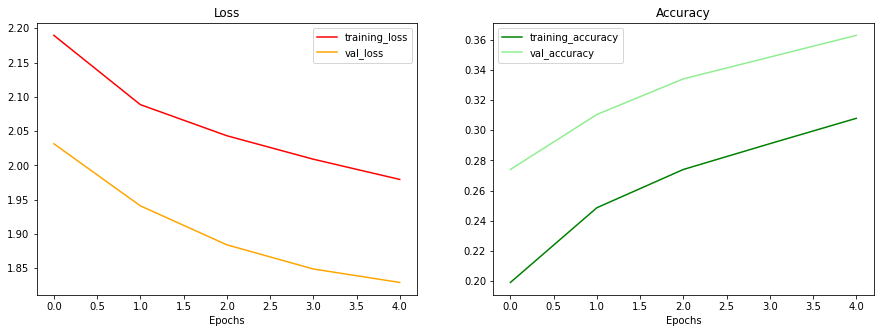

In [18]:
plot_loss_curves(history_14)

Epoch 1/10
235/235 [==============================] - 141s 593ms/step - loss: 2.2349 - accuracy: 0.1649 - val_loss: 2.1300 - val_accuracy: 0.2232
Epoch 2/10
235/235 [==============================] - 136s 579ms/step - loss: 2.1479 - accuracy: 0.2128 - val_loss: 2.0786 - val_accuracy: 0.2620
Epoch 3/10
235/235 [==============================] - 135s 576ms/step - loss: 2.0676 - accuracy: 0.2555 - val_loss: 1.9177 - val_accuracy: 0.3348
Epoch 4/10
235/235 [==============================] - 132s 563ms/step - loss: 2.0136 - accuracy: 0.2917 - val_loss: 1.8838 - val_accuracy: 0.3640
Epoch 5/10
235/235 [==============================] - 134s 572ms/step - loss: 1.9806 - accuracy: 0.3045 - val_loss: 1.8540 - val_accuracy: 0.3656
Epoch 6/10
235/235 [==============================] - 129s 549ms/step - loss: 1.9374 - accuracy: 0.3284 - val_loss: 1.7762 - val_accuracy: 0.3892
Epoch 7/10
235/235 [==============================] - 132s 560ms/step - loss: 1.9200 - accuracy: 0.3317 - val_loss: 1.8112 -

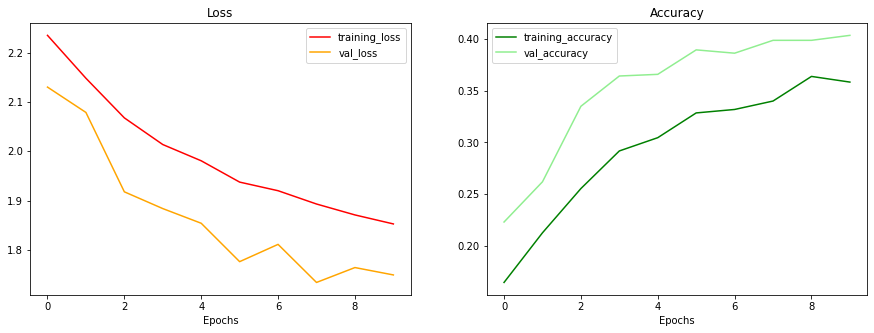

In [109]:
model_15 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(len(class_names), activation='softmax')
])

# Compile the cloned model (same setup as used for model_10)
model_15.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_15 = model_15.fit(train_data_augmented, # use augmented data
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

plot_loss_curves(history_15)

## Making a prediction with our trained model

In [19]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [20]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

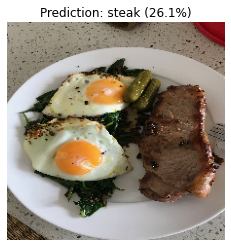

In [32]:
# Make a prediction using model_14
pred_and_plot(model_14, "03-steak.jpeg", class_names)

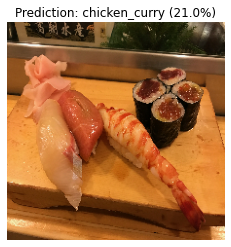

In [33]:
pred_and_plot(model_14, "03-sushi.jpeg", class_names)

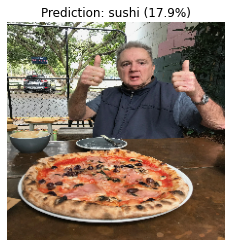

In [34]:
pred_and_plot(model_14, "03-pizza-dad.jpeg", class_names)

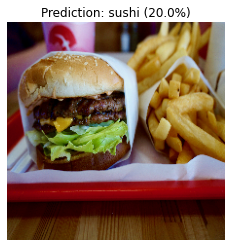

In [35]:
pred_and_plot(model_14, "03-hamburger.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~40% accuracy on the test dataset.

## Saving and loading our model
Once you've trained a model, you probably want to be able to save it and load it somewhere else.

To do so, we can use the `save` and `load_model` functions.

In [36]:
# Save a model
model_14.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [37]:
# Load in a model and evaluate it
loaded_model_14 = tf.keras.models.load_model("saved_trained_model")
loaded_model_14.evaluate(test_data)

79/79 [==============================] - 68s 164ms/step - loss: 1.8292 - accuracy: 0.3628


[1.829193115234375, 0.3628000020980835]

In [38]:
# Compare our unsaved model's results (same as above)
model_14.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 1.8292 - accuracy: 0.3628


[1.8291929960250854, 0.3628000020980835]